## Data_Analysis_of_Crime_rate_in_Los_Angeles

`Author: Aditya Aggarwal`

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

## The Data
# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EXPLANATION OF THE CODE OF THE ABOVE CODE CELL

1. pandas (pd):
Used for data manipulation and analysis.
Helps with reading/writing datasets, cleaning, transforming, and summarizing data.

Example:
df = pd.read_csv("data.csv")  # Reads a CSV file into a DataFrame.

2. numpy (np):
Used for numerical computations.
Provides support for arrays and mathematical operations on large datasets.

Example:
arr = np.array([1, 2, 3])  # Creates a NumPy array.

3. matplotlib.pyplot (plt):
Used for creating static, interactive, and animated visualizations.
Commonly used for creating line plots, bar charts, and scatter plots.

Example:
plt.plot([1, 2, 3], [4, 5, 6])  # Creates a line plot.
plt.show()

4. seaborn (sns):
Built on top of Matplotlib for advanced statistical visualizations.
Provides beautiful themes and high-level interfaces for visualizing data.

Example:
sns.countplot(data=df, x="column_name")  # Creates a count plot.

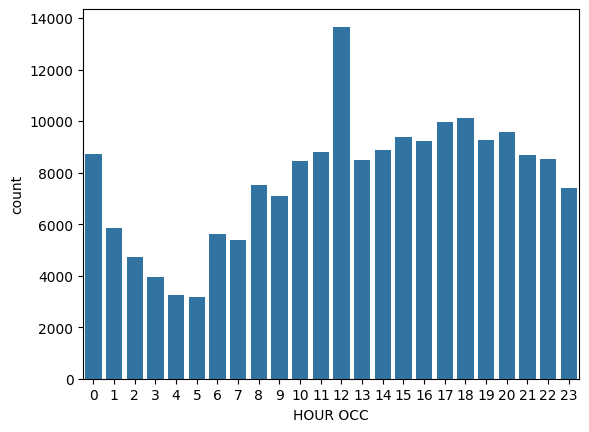

In [2]:
# Read in and preview the dataset
crimes = pd.read_csv("C:\\PROJECTS\\Analyse_the_crime_in_los_angeles\\crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

# Extract the first two digits from "TIME OCC", representing the hour,
# and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
crimes.head()

# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12

EXPLANATION OF THE CODE OF THE ABOVE CODE CELL

1. pd.read_csv:
Reads the dataset and converts specified columns (Date Rptd, DATE OCC) into datetime format using parse_dates.
Sets the TIME OCC column as a string using dtype={"TIME OCC": str} to preserve leading zeros.

2. crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int):
Extracts the first two characters from TIME OCC using .str[:2] to represent the hour.
Converts the extracted string into an integer using .astype(int).

3. sns.countplot(data=crimes, x="HOUR OCC"):
Creates a count plot with the HOUR OCC column to visualize the frequency of crimes per hour.

4. peak_crime_hour = 12:
Assigns the hour with the highest frequency of crimes (12 PM) to the variable peak_crime_hour.


In [3]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


EXPLANATION OF THE CODE OF THE ABOVE CODE CELL

1. night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]:
Filters the dataset to include only rows where the hour of occurrence (HOUR OCC) falls within the range of night-time hours (10 PM to 3:59 AM).

2. night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count():
Groups the filtered data by the AREA NAME column.
Counts the occurrences of crimes for each area.

3. .sort_values("HOUR OCC", ascending=False):
Sorts the grouped data in descending order based on the count of crimes.

4. .iloc[0]["AREA NAME"]:
Extracts the AREA NAME with the highest count (first row after sorting).

5. peak_night_crime_location = ...:
Stores the area with the highest frequency of night crimes in the variable peak_night_crime_location.

6. print(f"The area with the largest volume of night crime is {peak_night_crime_location}"):
Prints the name of the area with the highest frequency of night crimes.

In [4]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


EXPLANATION OF THE CODE OF THE ABOVE CODE CELL 

1. age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]:
Defines the age intervals for categorizing victims.
np.inf is used to represent ages 65 and above.

2. age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]:
Provides labels for the corresponding age intervals.

3. crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels):
Uses pd.cut() to create a new column, Age Bracket, that categorizes the Vict Age column into the defined age groups.

4. victim_ages = crimes["Age Bracket"].value_counts():
Counts the number of crimes committed against victims in each age group and saves the result as a Pandas Series named victim_ages.

5. print(victim_ages):
Displays the count of crimes for each age group.

CONCLUSION OF THE PROJECT

This project provided insights into crime patterns in Los Angeles using a structured dataset. Key findings include:

1. Peak Crime Times:

The highest crime frequency occurs at midday (12 PM).
Night crimes (10 PM to 3:59 AM) are most frequent in the Central area.

2. Victim Demographics:

The 26–34 age group faces the most crimes, followed by the 35–44 age group.

3. Data Analysis Techniques:

Used Python libraries (pandas, numpy, matplotlib, and seaborn) to clean, process, and visualize the data effectively.
Grouping, binning, and visual exploration techniques revealed actionable insights.
Implications
The analysis highlights the need for targeted resource allocation during peak crime hours and in high-crime areas like Central Los Angeles. Future studies can explore causative factors for these patterns to inform policy-making and public safety measures.